### Jambo Exploratory Analysis

* Just looking for patterns here.
* Data sourced from current POS system from opening date of the shop. Will try to update it regularly

An overview of the raw data

In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keys import conn_str

df = pd.read_sql_table('raw_sales', conn_str)
df.tail()

,index,Outlet,Number,Date,DueDate,SalesType,SalesPerson,Customer,CreatorID,Created,...,Variants.Cost,Variants.UnitQuantity,Variants.Quantity,Variants.Code,Variants.Name,Payments.Note,Payments.Code,Payments.Method,Payments.Amount,Payments.Date
13488,2750,Kayole Branch,21.01.513,2021-01-25T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2021-01-25T22:22:41.243,...,104.0,1.0,1.0,None,Velvet 4,None,None,Cash,130.0,2021-01-25T00:00:00
13489,2750,Kayole Branch,21.01.513,2021-01-25T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2021-01-25T22:22:41.243,...,17.0,1.0,1.0,None,Cotton Tops,None,None,Cash,130.0,2021-01-25T00:00:00
13490,2751,Kayole Branch,21.01.514,2021-01-25T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2021-01-25T22:33:50.673,...,150.0,1.0,1.0,None,pallazo pants 5,None,None,Cash,100.0,2021-01-25T00:00:00
13491,2752,Kayole Branch,21.01.515,2021-01-25T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2021-01-26T00:04:36.673,...,150.0,1.0,1.0,None,pallazo pants 5,None,None,Cash,190.0,2021-01-25T00:00:00
13492,2752,Kayole Branch,21.01.515,2021-01-25T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2021-01-26T00:04:36.673,...,104.0,1.0,1.0,None,Velvet 4,None,None,Cash,190.0,2021-01-25T00:00:00


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13493 entries, 0 to 13492
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    13493 non-null  int64  
 1   Outlet                   13493 non-null  object 
 2   Number                   13493 non-null  object 
 3   Date                     13493 non-null  object 
 4   DueDate                  13493 non-null  object 
 5   SalesType                13493 non-null  object 
 6   SalesPerson              0 non-null      object 
 7   Customer                 0 non-null      float64
 8   CreatorID                13493 non-null  object 
 9   Created                  13493 non-null  object 
 10  Discount1                13493 non-null  float64
 11  Discount2                13493 non-null  float64
 12  DiscountAmount           13493 non-null  float64
 13  Gross                    13493 non-null  float64
 14  DiscountTotal         

In [3]:
df.nunique()

index                      2759
Outlet                        1
Number                     9267
Date                        306
DueDate                       1
SalesType                     1
SalesPerson                   0
Customer                      0
CreatorID                     1
Created                    9264
Discount1                     3
Discount2                     3
DiscountAmount               21
Gross                       394
DiscountTotal                73
TaxType                       1
Tax                           1
Surcharge                     1
Sales                       420
SalesNTax                   420
Coupon                        0
Note                         14
InvoiceID                  9267
PointUsed                     1
PointsEarned                 32
Delivery                      2
Void                          1
Customer.Name                51
Customer.Email                0
Customer.Mobile              47
Customer.Code                37
Variants

Converting the 'Created' column to datetime and sorting the entries from oldest to newest.
Will be useful in the future

In [4]:
df[['date', 'time']] = df.Created.str.split("T", expand=True)
df.head()

,index,Outlet,Number,Date,DueDate,SalesType,SalesPerson,Customer,CreatorID,Created,...,Variants.Quantity,Variants.Code,Variants.Name,Payments.Note,Payments.Code,Payments.Method,Payments.Amount,Payments.Date,date,time
0,0,Kayole Branch,20.02.002,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2020-02-07T22:51:30.473,...,1.0,2001,Ladies Dress 200bob 2001,None,None,Cash,200.0,2020-02-07T00:00:00,2020-02-07,22:51:30.473
1,1,Kayole Branch,20.02.003,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2020-02-07T22:52:50.14,...,2.0,None,Men Trousers,None,None,Cash,400.0,2020-02-07T00:00:00,2020-02-07,22:52:50.14
2,2,Kayole Branch,20.02.004,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2020-02-07T22:53:26.45,...,1.0,None,Men tshirts,None,None,Cash,100.0,2020-02-07T00:00:00,2020-02-07,22:53:26.45
3,3,Kayole Branch,20.02.005,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2020-02-07T23:05:02.1,...,1.0,3003,Children Jackets 80bob 3003,None,None,Cash,380.0,2020-02-07T00:00:00,2020-02-07,23:05:02.1
4,3,Kayole Branch,20.02.005,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2020-02-07T23:05:02.1,...,1.0,None,Lady Hand bag,None,None,Cash,380.0,2020-02-07T00:00:00,2020-02-07,23:05:02.1


In [5]:
df[['hour', 'minute', 'second']] = df['time'].str.split(':', expand=True)
df.drop(columns='second', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13493 entries, 0 to 13492
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    13493 non-null  int64  
 1   Outlet                   13493 non-null  object 
 2   Number                   13493 non-null  object 
 3   Date                     13493 non-null  object 
 4   DueDate                  13493 non-null  object 
 5   SalesType                13493 non-null  object 
 6   SalesPerson              0 non-null      object 
 7   Customer                 0 non-null      float64
 8   CreatorID                13493 non-null  object 
 9   Created                  13493 non-null  object 
 10  Discount1                13493 non-null  float64
 11  Discount2                13493 non-null  float64
 12  DiscountAmount           13493 non-null  float64
 13  Gross                    13493 non-null  float64
 14  DiscountTotal         

In [6]:
df[['year', 'month', 'day']] = df.date.str.split('-', expand=True)
df.head()

,index,Outlet,Number,Date,DueDate,SalesType,SalesPerson,Customer,CreatorID,Created,...,Payments.Method,Payments.Amount,Payments.Date,date,time,hour,minute,year,month,day
0,0,Kayole Branch,20.02.002,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2020-02-07T22:51:30.473,...,Cash,200.0,2020-02-07T00:00:00,2020-02-07,22:51:30.473,22,51,2020,02,07
1,1,Kayole Branch,20.02.003,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2020-02-07T22:52:50.14,...,Cash,400.0,2020-02-07T00:00:00,2020-02-07,22:52:50.14,22,52,2020,02,07
2,2,Kayole Branch,20.02.004,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2020-02-07T22:53:26.45,...,Cash,100.0,2020-02-07T00:00:00,2020-02-07,22:53:26.45,22,53,2020,02,07
3,3,Kayole Branch,20.02.005,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2020-02-07T23:05:02.1,...,Cash,380.0,2020-02-07T00:00:00,2020-02-07,23:05:02.1,23,05,2020,02,07
4,3,Kayole Branch,20.02.005,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2020-02-07T23:05:02.1,...,Cash,380.0,2020-02-07T00:00:00,2020-02-07,23:05:02.1,23,05,2020,02,07


In [7]:
df['Created'] = pd.to_datetime(df['Created'], errors='coerce')
df['Created'] = df.Created.dt.round('T')
df.sort_values(by=['Created'], inplace=True, ascending=True, ignore_index=True)
df.Created.head()

0   2020-02-07 22:52:00
1   2020-02-07 22:53:00
2   2020-02-07 22:53:00
3   2020-02-07 23:05:00
4   2020-02-07 23:05:00
Name: Created, dtype: datetime64[ns]

Checking for the unique values per column. This will determine which columns to drop as we clean up the data

In [8]:
df.nunique()

index                      2759
Outlet                        1
Number                     9267
Date                        306
DueDate                       1
SalesType                     1
SalesPerson                   0
Customer                      0
CreatorID                     1
Created                    8810
Discount1                     3
Discount2                     3
DiscountAmount               21
Gross                       394
DiscountTotal                73
TaxType                       1
Tax                           1
Surcharge                     1
Sales                       420
SalesNTax                   420
Coupon                        0
Note                         14
InvoiceID                  9267
PointUsed                     1
PointsEarned                 32
Delivery                      2
Void                          1
Customer.Name                51
Customer.Email                0
Customer.Mobile              47
Customer.Code                37
Variants

Dropping the columns with only one unique value in them. These won't help us in the analysis as they are consistent

In [9]:
df = df.drop(['Outlet', 'DueDate', 'SalesType', 'SalesPerson', 'CreatorID', 'Discount1', 'Discount2',
              'DiscountAmount', 'DiscountTotal', 'TaxType', 'Tax', 'Surcharge', 'Sales', 'Coupon', 'Note',
              'Delivery', 'Void', 'date', 'time', 'SalesNTax', 'PointUsed', 'Outlet', 'Customer.Name', 'Customer.Mobile',
              'Customer.Code', 'Variants.Note', 'Variants.PriceTypeID', 'Variants.Expense', 'Variants.LoyaltyPoint',
              'Variants.Taxable', 'Variants.UnitQuantity', 'Customer', 'Customer.Email'], axis=1)

Checking for columns with Nan Values and dropping them

In [10]:
df.isna()


,index,Number,Date,Created,Gross,InvoiceID,PointsEarned,Variants.NettPrice,Variants.DiscountAmount,Variants.Discount,...,Payments.Note,Payments.Code,Payments.Method,Payments.Amount,Payments.Date,hour,minute,year,month,day
0,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13488,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
13489,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
13490,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
13491,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False


In [11]:
df.dropna(inplace=True, axis=1, how='all')
df.head()


,index,Number,Date,Created,Gross,InvoiceID,PointsEarned,Variants.NettPrice,Variants.DiscountAmount,Variants.Discount,...,Payments.Note,Payments.Code,Payments.Method,Payments.Amount,Payments.Date,hour,minute,year,month,day
0,0,20.02.002,2020-02-07T00:00:00,2020-02-07 22:52:00,200.0,a4f938d7-a234-49f9-9588-ea6dc1b547b2,0.0,200.0,0.0,0.0,...,None,None,Cash,200.0,2020-02-07T00:00:00,22,51,2020,02,07
1,1,20.02.003,2020-02-07T00:00:00,2020-02-07 22:53:00,400.0,89681b1f-21ab-4f0a-8780-3971de3f82b0,0.0,400.0,0.0,0.0,...,None,None,Cash,400.0,2020-02-07T00:00:00,22,52,2020,02,07
2,2,20.02.004,2020-02-07T00:00:00,2020-02-07 22:53:00,100.0,af594745-e964-4051-ae17-93b23b746743,0.0,100.0,0.0,0.0,...,None,None,Cash,100.0,2020-02-07T00:00:00,22,53,2020,02,07
3,3,20.02.005,2020-02-07T00:00:00,2020-02-07 23:05:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,80.0,0.0,0.0,...,None,None,Cash,380.0,2020-02-07T00:00:00,23,05,2020,02,07
4,3,20.02.005,2020-02-07T00:00:00,2020-02-07 23:05:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,300.0,0.0,0.0,...,None,None,Cash,380.0,2020-02-07T00:00:00,23,05,2020,02,07


In [12]:
df.nunique()

index                      2759
Number                     9267
Date                        306
Created                    8810
Gross                       394
InvoiceID                  9267
PointsEarned                 32
Variants.NettPrice          249
Variants.DiscountAmount       7
Variants.Discount             5
Variants.PriceOriginal       85
Variants.Price              115
Variants.Cost               157
Variants.Quantity            31
Variants.Code                 8
Variants.Name               260
Payments.Note               299
Payments.Code                30
Payments.Method               2
Payments.Amount             420
Payments.Date               307
hour                         13
minute                       60
year                          2
month                        12
day                          31
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13493 entries, 0 to 13492
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    13493 non-null  int64         
 1   Number                   13493 non-null  object        
 2   Date                     13493 non-null  object        
 3   Created                  13493 non-null  datetime64[ns]
 4   Gross                    13493 non-null  float64       
 5   InvoiceID                13493 non-null  object        
 6   PointsEarned             13493 non-null  float64       
 7   Variants.NettPrice       13493 non-null  float64       
 8   Variants.DiscountAmount  13493 non-null  float64       
 9   Variants.Discount        13493 non-null  float64       
 10  Variants.PriceOriginal   13493 non-null  float64       
 11  Variants.Price           13493 non-null  float64       
 12  Variants.Cost            13493 n

## Best month for sales?

In [14]:
df_2020 = df.loc[(df['year']=='2020')]
monthly_sales_2020 = df_2020.groupby('month').sum()

In [15]:
monthly_sales_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 02 to 12
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    11 non-null     int64  
 1   Gross                    11 non-null     float64
 2   PointsEarned             11 non-null     float64
 3   Variants.NettPrice       11 non-null     float64
 4   Variants.DiscountAmount  11 non-null     float64
 5   Variants.Discount        11 non-null     float64
 6   Variants.PriceOriginal   11 non-null     float64
 7   Variants.Price           11 non-null     float64
 8   Variants.Cost            11 non-null     float64
 9   Variants.Quantity        11 non-null     float64
 10  Payments.Amount          11 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 1.0+ KB


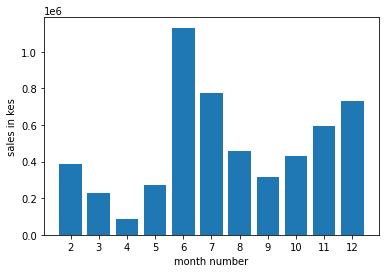

In [16]:
months = range(2,13)
plt.bar(months, monthly_sales_2020['Gross'])
plt.xticks(months)
plt.ylabel('sales in kes')
plt.xlabel('month number')
plt.show()

## Best time of the day for sales

In [17]:
df['Count'] = 1
df.head()

,index,Number,Date,Created,Gross,InvoiceID,PointsEarned,Variants.NettPrice,Variants.DiscountAmount,Variants.Discount,...,Payments.Code,Payments.Method,Payments.Amount,Payments.Date,hour,minute,year,month,day,Count
0,0,20.02.002,2020-02-07T00:00:00,2020-02-07 22:52:00,200.0,a4f938d7-a234-49f9-9588-ea6dc1b547b2,0.0,200.0,0.0,0.0,...,None,Cash,200.0,2020-02-07T00:00:00,22,51,2020,02,07,1
1,1,20.02.003,2020-02-07T00:00:00,2020-02-07 22:53:00,400.0,89681b1f-21ab-4f0a-8780-3971de3f82b0,0.0,400.0,0.0,0.0,...,None,Cash,400.0,2020-02-07T00:00:00,22,52,2020,02,07,1
2,2,20.02.004,2020-02-07T00:00:00,2020-02-07 22:53:00,100.0,af594745-e964-4051-ae17-93b23b746743,0.0,100.0,0.0,0.0,...,None,Cash,100.0,2020-02-07T00:00:00,22,53,2020,02,07,1
3,3,20.02.005,2020-02-07T00:00:00,2020-02-07 23:05:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,80.0,0.0,0.0,...,None,Cash,380.0,2020-02-07T00:00:00,23,05,2020,02,07,1
4,3,20.02.005,2020-02-07T00:00:00,2020-02-07 23:05:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,300.0,0.0,0.0,...,None,Cash,380.0,2020-02-07T00:00:00,23,05,2020,02,07,1


In [18]:
df.groupby(['hour']).count()['Count']

hour
00     356
01       6
13       5
14     121
15     574
16    1020
17    1412
18    1553
19    1478
20    1524
21    1894
22    1875
23    1675
Name: Count, dtype: int64

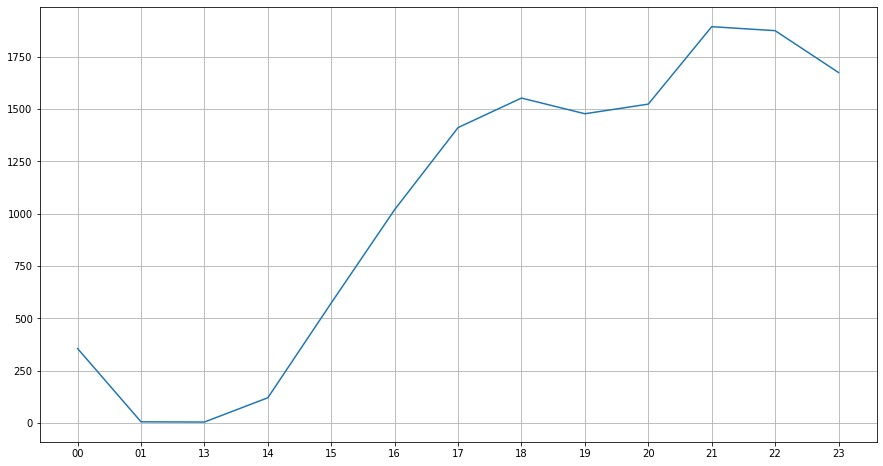

In [19]:
keys = [pair for pair, df in df.groupby(['hour'])]
plt.figure(figsize=(15,8))
plt.plot(keys, df.groupby(['hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

## Best-selling items

In [20]:
product_group = df.groupby('Variants.Name')
product_group.sum()

,index,Gross,PointsEarned,Variants.NettPrice,Variants.DiscountAmount,Variants.Discount,Variants.PriceOriginal,Variants.Price,Variants.Cost,Variants.Quantity,Payments.Amount,Count
Variants.Name,,,,,,,,,,,,
32 inch Synix Digital,317,13000.0,0.0,13000.0,0.0,0.0,13800.0,13000.0,10800.0,1.0,13000.0,1
32 inch Synix SMART,937,16700.0,0.0,16700.0,0.0,0.0,16700.0,16700.0,13700.0,1.0,14700.0,1
79519 Black Official Shoes LIAO,6087,9639.0,0.0,7941.0,0.0,0.0,2300.0,6941.0,6300.0,8.0,9639.0,7
963 LIAO shoes Official Men shoes,7748,7149.0,0.0,6699.0,0.0,0.0,7140.0,6699.0,6300.0,7.0,7149.0,7
AMAYA truael Charger,486,250.0,0.0,150.0,0.0,0.0,200.0,150.0,100.0,1.0,250.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
"school shoes n.5,6,7 950",1952,950.0,0.0,950.0,0.0,0.0,950.0,950.0,760.0,1.0,950.0,1
skinny jeans,31686,21430.0,0.0,16470.0,0.0,0.0,13650.0,9650.0,6825.0,64.0,21370.0,39
socks,433401,109788.0,18.0,22840.0,0.0,0.0,10590.0,9840.0,4942.0,804.0,108628.0,353


In [21]:
quantity_sold = product_group.sum().sort_values(by='Variants.Quantity', ascending=False)[['Variants.Quantity', 'Variants.NettPrice']]
quantity_sold

,Variants.Quantity,Variants.NettPrice
Variants.Name,,
Fagia,1258.0,24880.0
socks,804.0,22840.0
Chiffon Tops Long Sleeve,655.0,46151.0
Stockings,570.0,16200.0
Newborns,481.0,27990.0
...,...,...
LED HD tv,1.0,3000.0
Kids Bike FMK,1.0,2200.0
Synix Smart TV 43 inch,1.0,26000.0


In [22]:
quantity_sold['Item.Price'] = quantity_sold['Variants.NettPrice'] / quantity_sold['Variants.Quantity']

quantity_sold

,Variants.Quantity,Variants.NettPrice,Item.Price
Variants.Name,,,
Fagia,1258.0,24880.0,19.777424
socks,804.0,22840.0,28.407960
Chiffon Tops Long Sleeve,655.0,46151.0,70.459542
Stockings,570.0,16200.0,28.421053
Newborns,481.0,27990.0,58.191268
...,...,...,...
LED HD tv,1.0,3000.0,3000.000000
Kids Bike FMK,1.0,2200.0,2200.000000
Synix Smart TV 43 inch,1.0,26000.0,26000.000000


<function matplotlib.pyplot.show(close=None, block=None)>

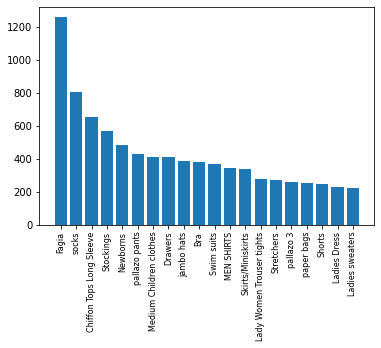

In [23]:
products = [product for product, df in product_group]
top_products = quantity_sold.index[:20]
top_quantity = quantity_sold.iloc[:20]['Variants.Quantity']
plt.bar(top_products, top_quantity)
plt.xticks(top_products, rotation='vertical', size=8)
plt.show

In [24]:
prices = df.groupby('Variants.Name').mean()['Variants.NettPrice'].iloc[0:20]
prices

Variants.Name
32 inch Synix Digital                13000.000000
32 inch Synix SMART                  16700.000000
79519 Black Official Shoes LIAO       1134.428571
963 LIAO shoes Official Men shoes      957.000000
AMAYA truael Charger                   150.000000
Adult Hoodies Jumper                   153.600000
Air Fornce                             430.000000
Amaya USB Data Cable                   133.333333
Army Platdon Metal Model              1600.000000
Baby Carrier                          1000.000000
Baby Fleece Blankets                   650.000000
Baby Jacket Lisa                       162.500000
Baby Shawl Heavy                       800.000000
Baby Shawl Heavy NN 1000               810.000000
Baby Shawl Light                       350.000000
Baby Sheets 200                        375.000000
Baby Skipping Rope                      50.000000
Baby Socks                             137.500000
Baby Toy Jigglers Advanced              38.333333
Baby Toy Jigglers(guitar,insect)    

This is a list of the top 20 most sold items at the store

<ipython-input-25-f9e4a28ec98f>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_products, rotation='vertical', size=8)
<ipython-input-25-f9e4a28ec98f>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


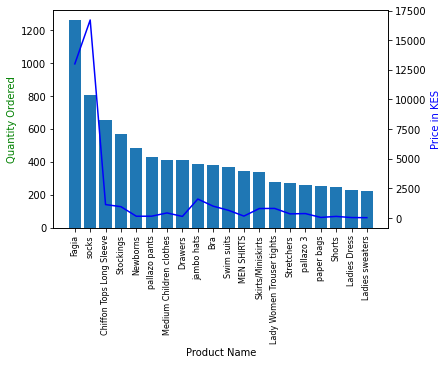

In [25]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(top_products, top_quantity)
ax2.plot(top_products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price in KES', color='b')
ax1.set_xticklabels(top_products, rotation='vertical', size=8)

fig.show()

## What items are sold together?

In [26]:
df_dup = df[df['Number'].duplicated(keep=False)]
df_dup.head()

,index,Number,Date,Created,Gross,InvoiceID,PointsEarned,Variants.NettPrice,Variants.DiscountAmount,Variants.Discount,...,Payments.Code,Payments.Method,Payments.Amount,Payments.Date,hour,minute,year,month,day,Count
3,3,20.02.005,2020-02-07T00:00:00,2020-02-07 23:05:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,80.0,0.0,0.0,...,None,Cash,380.0,2020-02-07T00:00:00,23,05,2020,02,07,1
4,3,20.02.005,2020-02-07T00:00:00,2020-02-07 23:05:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,300.0,0.0,0.0,...,None,Cash,380.0,2020-02-07T00:00:00,23,05,2020,02,07,1
6,5,20.02.007,2020-02-07T00:00:00,2020-02-07 23:44:00,300.0,221f4b98-a733-477d-900c-82ea73a0d45e,0.0,100.0,0.0,0.0,...,None,Cash,300.0,2020-02-07T00:00:00,23,44,2020,02,07,1
7,5,20.02.007,2020-02-07T00:00:00,2020-02-07 23:44:00,300.0,221f4b98-a733-477d-900c-82ea73a0d45e,0.0,200.0,0.0,0.0,...,None,Cash,300.0,2020-02-07T00:00:00,23,44,2020,02,07,1
9,7,20.02.009,2020-02-07T00:00:00,2020-02-08 00:05:00,200.0,e0421c3e-7a48-4db1-80ee-d4f848e9839b,0.0,100.0,0.0,0.0,...,None,Cash,200.0,2020-02-07T00:00:00,00,05,2020,02,08,1


In [27]:
df_dup['Items.Grouped'] = df_dup.groupby('Number')['Variants.Name'].transform(lambda x: ', '.join(x))
df_dup.head()

<ipython-input-27-282658f01a70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['Items.Grouped'] = df_dup.groupby('Number')['Variants.Name'].transform(lambda x: ', '.join(x))


,index,Number,Date,Created,Gross,InvoiceID,PointsEarned,Variants.NettPrice,Variants.DiscountAmount,Variants.Discount,...,Payments.Method,Payments.Amount,Payments.Date,hour,minute,year,month,day,Count,Items.Grouped
3,3,20.02.005,2020-02-07T00:00:00,2020-02-07 23:05:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,80.0,0.0,0.0,...,Cash,380.0,2020-02-07T00:00:00,23,05,2020,02,07,1,"Children Jackets 80bob 3003, Lady Hand bag"
4,3,20.02.005,2020-02-07T00:00:00,2020-02-07 23:05:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,300.0,0.0,0.0,...,Cash,380.0,2020-02-07T00:00:00,23,05,2020,02,07,1,"Children Jackets 80bob 3003, Lady Hand bag"
6,5,20.02.007,2020-02-07T00:00:00,2020-02-07 23:44:00,300.0,221f4b98-a733-477d-900c-82ea73a0d45e,0.0,100.0,0.0,0.0,...,Cash,300.0,2020-02-07T00:00:00,23,44,2020,02,07,1,"Blazers DKJ 230 7, Jackets 200"
7,5,20.02.007,2020-02-07T00:00:00,2020-02-07 23:44:00,300.0,221f4b98-a733-477d-900c-82ea73a0d45e,0.0,200.0,0.0,0.0,...,Cash,300.0,2020-02-07T00:00:00,23,44,2020,02,07,1,"Blazers DKJ 230 7, Jackets 200"
9,7,20.02.009,2020-02-07T00:00:00,2020-02-08 00:05:00,200.0,e0421c3e-7a48-4db1-80ee-d4f848e9839b,0.0,100.0,0.0,0.0,...,Cash,200.0,2020-02-07T00:00:00,00,05,2020,02,08,1,"Men tshirts, Chiffon Tops Long Sleeve"


In [28]:
df_dup = df_dup[['Number', 'Items.Grouped']].drop_duplicates()
df_dup.head()

,Number,Items.Grouped
3,20.02.005,"Children Jackets 80bob 3003, Lady Hand bag"
6,20.02.007,"Blazers DKJ 230 7, Jackets 200"
9,20.02.009,"Men tshirts, Chiffon Tops Long Sleeve"
13,20.02.012,"MEN SHIRTS, Track Tops"
21,20.02.018,"Household, Tshirt, Jackets 200"


In [29]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_dup['Items.Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

grp_count = count.most_common(10)

This is a list of the most popular combination of items sold at the store

In [30]:
df_grp = pd.DataFrame(grp_count)
df_grp.columns = ['combination', 'count']
df_grp


,combination,count
0,"(Skirts/Miniskirts, Chiffon Tops Long Sleeve)",11
1,"(Chiffon Tops Long Sleeve, jambo hats)",9
2,"(Fagia, paper bags)",9
3,"(Stretchers, Ladies sweaters)",9
4,"(pallazo shorts, pallazo 3)",9
5,"(socks, Drawers)",9
6,"(Chiffon Tops Long Sleeve, Lady Women Trouser...",8
7,"(pallazo pants, Bra)",8
8,"(pallazo pants, Ladies Dress)",7
9,"(Skirts/Miniskirts, fashion pants)",7
